Importing Libraries

In [116]:
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Collection & Preprocessing

In [117]:
cols = ['index', 'budget', 'genres', 'keywords', 
        'popularity', 'revenue', 'title', 'vote_average',
        'vote_count', 'cast', 'director']
movies_data = pd.read_csv('/content/drive/MyDrive/movies.csv', usecols=cols)
movies_data.head()

,index,budget,genres,keywords,popularity,revenue,title,vote_average,vote_count,cast,director
0,0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2787965087,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,961000000,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,880674609,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,1084939099,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,284139100,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


Data Analysis

In [118]:
movies_data.shape

(4803, 11)

In [119]:
movies_data.columns

Index(['index', 'budget', 'genres', 'keywords', 'popularity', 'revenue',
       'title', 'vote_average', 'vote_count', 'cast', 'director'],
      dtype='object')

In [120]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4803 non-null   int64  
 1   budget        4803 non-null   int64  
 2   genres        4775 non-null   object 
 3   keywords      4391 non-null   object 
 4   popularity    4803 non-null   float64
 5   revenue       4803 non-null   int64  
 6   title         4803 non-null   object 
 7   vote_average  4803 non-null   float64
 8   vote_count    4803 non-null   int64  
 9   cast          4760 non-null   object 
 10  director      4773 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 412.9+ KB


In [121]:
movies_data.describe()

,index,budget,popularity,revenue,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,1386.651002,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1200.500000,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,2401.000000,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,3601.500000,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,4802.000000,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


In [122]:
movies_data.corr()

,index,budget,popularity,revenue,vote_average,vote_count
index,1.000000,-0.761579,-0.414342,-0.522110,-0.120157,-0.442207
budget,-0.761579,1.000000,0.505414,0.730823,0.093146,0.593180
popularity,-0.414342,0.505414,1.000000,0.644724,0.273952,0.778130
revenue,-0.522110,0.730823,0.644724,1.000000,0.197150,0.781487
vote_average,-0.120157,0.093146,0.273952,0.197150,1.000000,0.312997
vote_count,-0.442207,0.593180,0.778130,0.781487,0.312997,1.000000


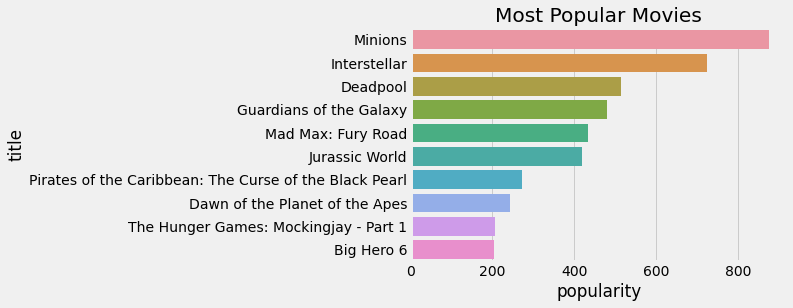

In [123]:
most_popular = movies_data.sort_values(by='popularity', ascending=False)[:10]
plt.style.use('fivethirtyeight')
plt.title('Most Popular Movies')
sns.barplot(data=most_popular, y='title', x='popularity')
plt.show()

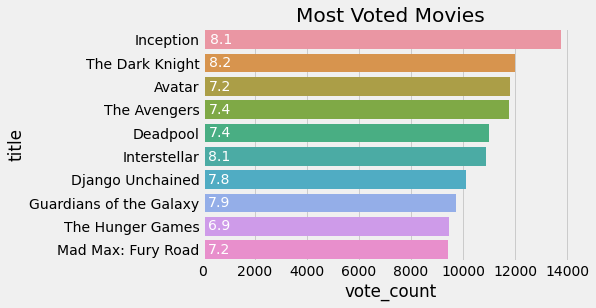

In [124]:
fig, ax = plt.subplots()
highly_rated = movies_data.sort_values(by='vote_count', ascending=False)[:10]
plt.title('Most Voted Movies')
barh = sns.barplot(data=highly_rated, y='title', x='vote_count')
for bar, avg in zip(ax.patches, highly_rated['vote_average']):
  ax.text(bar.get_width()*0.02, bar.get_y()+bar.get_height()/2, avg, color='white', ha='left', va='center')
plt.show()

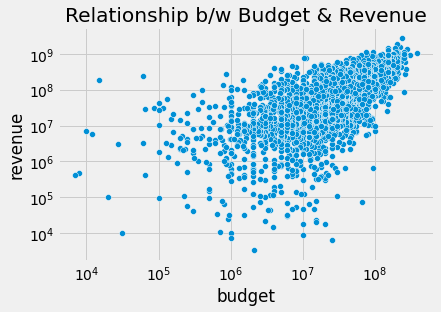

In [125]:
filt1 = movies_data['budget'] > 1000
br = movies_data[filt1]
br = br[br['revenue'] > 1000]
plt.title('Relationship b/w Budget & Revenue')
sns.scatterplot(data=br, x='budget', y='revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [128]:
selected_features = ['genres','keywords','cast','director']
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('', )
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['cast']+' '+movies_data['director']
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  Edward Burns Kerry Bish\u00e9 ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      Daniel Henney Eliza Coupe Bill Paxton Alan R...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [129]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 2061)	0.18678214793744197
  (0, 6542)	0.12250886401691784
  (0, 11217)	0.21004511389940914
  (0, 8831)	0.17365703713079808
  (0, 7496)	0.24557305356150633
  (0, 12567)	0.16383787425669902
  (0, 14291)	0.21458309577216156
  (0, 12134)	0.22272408661423276
  (0, 11490)	0.23546951253664175
  (0, 14820)	0.2184182305681937
  (0, 14561)	0.25567659458637093
  (0, 11517)	0.16271392202818094
  (0, 12299)	0.23546951253664175
  (0, 2755)	0.2699167358611062
  (0, 14235)	0.1389277198420819
  (0, 12386)	0.376936512374071
  (0, 4886)	0.19838040431463286
  (0, 2616)	0.24276191286779358
  (0, 3115)	0.23133291228677105
  (0, 4566)	0.1122735385607623
  (0, 11745)	0.11214224678270057
  (0, 4435)	0.12020924576100474
  (0, 144)	0.09834166706222157
  (0, 86)	0.08508837387249067
  (1, 14017)	0.22400344453980411
  :	:
  (4801, 2978)	0.33834361914099015
  (4801, 11361)	0.32272594588687986
  (4801, 14796)	0.32272594588687986
  (4801, 4098)	0.27635141577618744
  (4801, 252)	0.19823136055146653
  (4801, 5844)

In [130]:
neigh = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 25)
neigh.fit(feature_vectors)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=25)

In [132]:
movie_name = input('Enter your favourite movie: ')

all_titles = movies_data['title'].tolist()
close_match = difflib.get_close_matches(movie_name, all_titles)[0]
match_index = movies_data[movies_data.title == close_match]['index'].values[0]
distance, indices = neigh.kneighbors(feature_vectors[match_index], n_neighbors = 11)

print(f'\nRecommendations for {close_match}:')
for i, index in enumerate(indices.flatten()[1:]):
  print(f'{i+1}. {movies_data["title"][index]}')

Enter your favourite movie: iron man

Recommendations for Iron Man:
1. Iron Man 2
2. Iron Man 3
3. Avengers: Age of Ultron
4. The Avengers
5. Captain America: Civil War
6. Made
7. Captain America: The Winter Soldier
8. X-Men
9. X2
10. Ant-Man
